# Objective:We want to create association rule for books

In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
# conda install -c conda-forge mlxtend

In [2]:
book = pd.read_csv("D:\\Data sets\\book.csv")
book.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [3]:
book.shape

(2000, 11)

In [4]:
frequent_itemsets = apriori(book, min_support=0.1, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(ChildBks, YouthBks)"


In [5]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.8)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
...,...,...,...,...,...,...,...,...,...
95,"(GeogBks, ArtBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812
96,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
97,(GeogBks),"(CookBks, ArtBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800
98,(CookBks),"(GeogBks, ArtBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237


In [6]:
rules.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
29,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
28,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
76,"(ChildBks, ArtBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
81,(GeogBks),"(ChildBks, ArtBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448
86,(ArtBks),"(CookBks, DoItYBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674
83,"(CookBks, DoItYBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797
97,(GeogBks),"(CookBks, ArtBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800
96,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
99,(ArtBks),"(GeogBks, CookBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327
94,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657


# Rule for CookBks

In [7]:
fname='CookBks'
rules_CookBks =(rules.lift>1) & (rules['antecedents'].astype(str).str.contains(fname)) 
rules.loc[rules_CookBks,["antecedents","consequents"]]

,antecedents,consequents
3,(CookBks),(ChildBks)
12,(CookBks),(YouthBks)
20,(CookBks),(DoItYBks)
22,(CookBks),(RefBks)
24,(CookBks),(ArtBks)
27,(CookBks),(GeogBks)
29,(CookBks),(ItalCook)
40,"(ChildBks, CookBks)",(YouthBks)
42,"(CookBks, YouthBks)",(ChildBks)
44,(CookBks),"(ChildBks, YouthBks)"


# Rule for ChildBks

In [8]:
fname='ChildBks'
rules_ChildBks =(rules.lift>1) & (rules['antecedents'].astype(str).str.contains(fname))
rules.loc[rules_ChildBks,["antecedents","consequents"]]

,antecedents,consequents
0,(ChildBks),(YouthBks)
2,(ChildBks),(CookBks)
4,(ChildBks),(DoItYBks)
6,(ChildBks),(RefBks)
8,(ChildBks),(ArtBks)
10,(ChildBks),(GeogBks)
40,"(ChildBks, CookBks)",(YouthBks)
41,"(ChildBks, YouthBks)",(CookBks)
43,(ChildBks),"(CookBks, YouthBks)"
46,"(ChildBks, CookBks)",(DoItYBks)


# Rule for YouthBks

In [9]:
fname='YouthBks'
rules_YouthBks =(rules.lift>1) & (rules['antecedents'].astype(str).str.contains(fname)) | (rules['consequents'].astype(str).str.contains(fname)) 
rules.loc[rules_YouthBks,["antecedents","consequents"]]

,antecedents,consequents
0,(ChildBks),(YouthBks)
1,(YouthBks),(ChildBks)
12,(CookBks),(YouthBks)
13,(YouthBks),(CookBks)
14,(YouthBks),(DoItYBks)
15,(DoItYBks),(YouthBks)
16,(ArtBks),(YouthBks)
17,(YouthBks),(ArtBks)
18,(GeogBks),(YouthBks)
19,(YouthBks),(GeogBks)


# Rule for RefBks

In [10]:
fname='RefBks'
rules_RefBks =(rules.lift>1) & (rules['antecedents'].astype(str).str.contains(fname))
rules.loc[rules_RefBks,["antecedents","consequents"]]

,antecedents,consequents
7,(RefBks),(ChildBks)
23,(RefBks),(CookBks)
30,(RefBks),(DoItYBks)
37,(RefBks),(GeogBks)
53,"(ChildBks, RefBks)",(CookBks)
54,"(CookBks, RefBks)",(ChildBks)
57,(RefBks),"(ChildBks, CookBks)"


# Rule for DoItYBks

In [11]:
fname='DoItYBks'
rules_DoItYBks =(rules.lift>1) & (rules['antecedents'].astype(str).str.contains(fname))
rules.loc[rules_DoItYBks,["antecedents","consequents"]]

,antecedents,consequents
5,(DoItYBks),(ChildBks)
15,(DoItYBks),(YouthBks)
21,(DoItYBks),(CookBks)
31,(DoItYBks),(RefBks)
33,(DoItYBks),(ArtBks)
35,(DoItYBks),(GeogBks)
47,"(ChildBks, DoItYBks)",(CookBks)
48,"(CookBks, DoItYBks)",(ChildBks)
51,(DoItYBks),"(ChildBks, CookBks)"
71,"(ChildBks, DoItYBks)",(GeogBks)


# Rule for ArtBk 

In [12]:
fname='ArtBks'
rules_ArtBks =(rules.lift>1) & (rules['antecedents'].astype(str).str.contains(fname))
rules.loc[rules_ArtBks,["antecedents","consequents"]]

,antecedents,consequents
9,(ArtBks),(ChildBks)
16,(ArtBks),(YouthBks)
25,(ArtBks),(CookBks)
32,(ArtBks),(DoItYBks)
39,(ArtBks),(GeogBks)
59,"(ChildBks, ArtBks)",(CookBks)
60,"(CookBks, ArtBks)",(ChildBks)
63,(ArtBks),"(ChildBks, CookBks)"
76,"(ChildBks, ArtBks)",(GeogBks)
78,"(GeogBks, ArtBks)",(ChildBks)


# Rule for GeogBks

In [13]:
fname='GeogBks'
rules_GeogBks =(rules.lift>1) & (rules['antecedents'].astype(str).str.contains(fname))
rules.loc[rules_GeogBks,["antecedents","consequents"]]

,antecedents,consequents
11,(GeogBks),(ChildBks)
18,(GeogBks),(YouthBks)
26,(GeogBks),(CookBks)
34,(GeogBks),(DoItYBks)
36,(GeogBks),(RefBks)
38,(GeogBks),(ArtBks)
65,"(ChildBks, GeogBks)",(CookBks)
66,"(GeogBks, CookBks)",(ChildBks)
69,(GeogBks),"(ChildBks, CookBks)"
70,"(ChildBks, GeogBks)",(DoItYBks)


# Rule for ItalCook

In [14]:
fname='ItalCook'
rules_ItalCook =(rules.lift>1) & (rules['antecedents'].astype(str).str.contains(fname))
rules.loc[rules_ItalCook,["antecedents","consequents"]]

,antecedents,consequents
28,(ItalCook),(CookBks)


# # Rule for ItalArt

In [15]:
fname='ItalArt'
rules_ItalArt =(rules.lift>1) & (rules['antecedents'].astype(str).str.contains(fname))
rules.loc[rules_ItalArt,["antecedents","consequents"]]

,antecedents,consequents


# Rule for Florence

In [16]:
fname='Florence'
rules_Florence =(rules.lift>1) & (rules['antecedents'].astype(str).str.contains(fname))
rules.loc[rules_Florence,["antecedents","consequents"]]

,antecedents,consequents


# Rule for ItalAtlas

In [17]:
fname='ItalAtlas'
rules_ItalAtlas =(rules.lift>1) & (rules['antecedents'].astype(str).str.contains(fname))
rules.loc[rules_ItalAtlas,["antecedents","consequents"]]

,antecedents,consequents


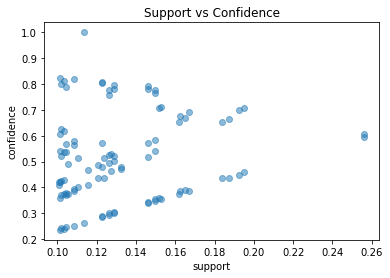

In [18]:
import matplotlib.pyplot as plt
plt.scatter(rules['support'], rules['confidence'],alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

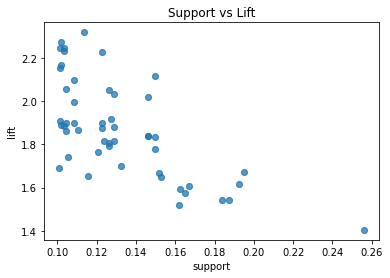

In [19]:
plt.scatter(rules["support"], rules["lift"], alpha=0.5)
plt.xlabel("support")
plt.ylabel("lift")
plt.title("Support vs Lift")
plt.show()

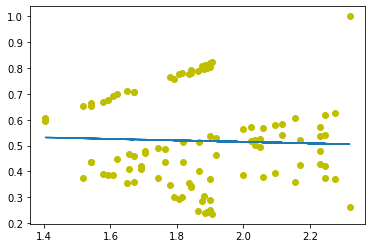

In [20]:
import numpy as np
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], 
 fit_fn(rules['lift']))

# Conclusion:We have make the rules for books association we can use first 5 high lift rules as a pailate and observe the result  

# Objective:We want to create association rule for groceries

In [21]:
groceries = pd.read_csv("D:\\Data sets\\groceries.csv",sep='\t',header=None)


In [22]:
groceries.head()

,0
0,"citrus fruit,semi-finished bread,margarine,rea..."
1,"tropical fruit,yogurt,coffee"
2,whole milk
3,"pip fruit,yogurt,cream cheese ,meat spreads"
4,"other vegetables,whole milk,condensed milk,lon..."


In [23]:
groceries.columns=['items']

In [24]:
 groceries

,items
0,"citrus fruit,semi-finished bread,margarine,rea..."
1,"tropical fruit,yogurt,coffee"
2,whole milk
3,"pip fruit,yogurt,cream cheese ,meat spreads"
4,"other vegetables,whole milk,condensed milk,lon..."
...,...
9830,"sausage,chicken,beef,hamburger meat,citrus fru..."
9831,cooking chocolate
9832,"chicken,citrus fruit,other vegetables,butter,y..."
9833,"semi-finished bread,bottled water,soda,bottled..."


In [25]:
groceries=list(groceries["items"].apply(lambda x:x.split(',')))

In [26]:
te=TransactionEncoder()
te_data=te.fit(groceries).transform(groceries)
df=pd.DataFrame(te_data,columns=te.columns_).astype(int)
df

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
9831,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9832,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9833,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
frequent_itemsets = apriori(df, min_support=0.05, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.052466,(beef)
1,0.080529,(bottled beer)
2,0.110524,(bottled water)
3,0.064870,(brown bread)
4,0.055414,(butter)
5,0.077682,(canned beer)
6,0.082766,(citrus fruit)
7,0.058058,(coffee)
8,0.053279,(curd)
9,0.063447,(domestic eggs)


In [28]:
rules2 = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(whole milk),(other vegetables),0.255516,0.193493,0.074835,0.292877,1.513634,0.025394,1.140548
1,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,0.025394,1.214013
2,(rolls/buns),(whole milk),0.183935,0.255516,0.056634,0.307905,1.205032,0.009636,1.075696
3,(whole milk),(rolls/buns),0.255516,0.183935,0.056634,0.221647,1.205032,0.009636,1.048452
4,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,0.020379,1.244132
5,(whole milk),(yogurt),0.255516,0.139502,0.056024,0.219260,1.571735,0.020379,1.102157


# Conclusion:We have make the rules for groceries association we can use this rules and observe the result

# Objective:We want to create association rule for Movies

In [29]:
movies = pd.read_csv("D:\\Data sets\\my_movies.csv")


In [30]:
movies.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [31]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


In [32]:
df=movies.iloc[:,5:16]

In [43]:
frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [44]:
rules3 = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
4,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
...,...,...,...,...,...,...,...,...,...
233,(LOTR1),"(Harry Potter1, LOTR2, Sixth Sense, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
234,(LOTR2),"(LOTR1, Harry Potter1, Sixth Sense, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
235,(Sixth Sense),"(LOTR1, LOTR2, Harry Potter1, Green Mile)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
236,(Green Mile),"(Harry Potter1, LOTR1, LOTR2, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


In [45]:
rules3.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
202,"(LOTR2, Green Mile)","(LOTR1, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
189,"(LOTR2, Green Mile)","(Sixth Sense, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
95,"(Gladiator, Green Mile)",(LOTR),0.1,0.1,0.1,1.0,10.0,0.09,inf
130,"(Gladiator, Green Mile)","(LOTR, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf
131,"(LOTR, Sixth Sense)","(Gladiator, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
160,"(Harry Potter1, Green Mile)","(LOTR1, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf
201,"(LOTR2, Harry Potter1)","(LOTR1, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
200,"(LOTR1, Green Mile)","(LOTR2, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
199,"(LOTR1, Harry Potter1)","(LOTR2, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
136,(LOTR),"(Gladiator, Sixth Sense, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf


In [46]:
rules3[rules3["lift"]>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
4,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
...,...,...,...,...,...,...,...,...,...
233,(LOTR1),"(Harry Potter1, LOTR2, Sixth Sense, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
234,(LOTR2),"(LOTR1, Harry Potter1, Sixth Sense, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
235,(Sixth Sense),"(LOTR1, LOTR2, Harry Potter1, Green Mile)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
236,(Green Mile),"(Harry Potter1, LOTR1, LOTR2, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


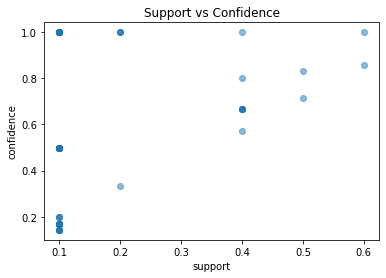

In [47]:
import matplotlib.pyplot as plt
plt.scatter(rules3['support'], rules3['confidence'],alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

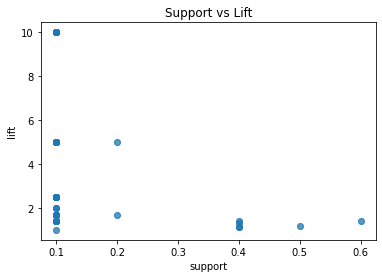

In [48]:
plt.scatter(rules3["support"], rules3["lift"], alpha=0.5)
plt.xlabel("support")
plt.ylabel("lift")
plt.title("Support vs Lift")
plt.show()